# EDA: bike station across london boroughs

In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import random
import geopandas as gpd
from folium.plugins import HeatMap
from IPython.display import IFrame
import itertools

In [89]:
# import
bike_locs = pd.read_csv('/Users/tabea/Documents/UrbanMobility/data/bike_locations.csv')

In [148]:
# define density colors
colormap_density = ["#f7fbff","#f6faff","#f5fafe","#f5f9fe","#f4f9fe","#f3f8fe","#f2f8fd","#f2f7fd","#f1f7fd","#f0f6fd","#eff6fc","#eef5fc","#eef5fc","#edf4fc","#ecf4fb","#ebf3fb","#eaf3fb","#eaf2fb","#e9f2fa","#e8f1fa","#e7f1fa","#e7f0fa","#e6f0f9","#e5eff9","#e4eff9","#e3eef9","#e3eef8","#e2edf8","#e1edf8","#e0ecf8","#e0ecf7","#dfebf7","#deebf7","#ddeaf7","#ddeaf6","#dce9f6","#dbe9f6","#dae8f6","#d9e8f5","#d9e7f5","#d8e7f5","#d7e6f5","#d6e6f4","#d6e5f4","#d5e5f4","#d4e4f4","#d3e4f3","#d2e3f3","#d2e3f3","#d1e2f3","#d0e2f2","#cfe1f2","#cee1f2","#cde0f1","#cce0f1","#ccdff1","#cbdff1","#cadef0","#c9def0","#c8ddf0","#c7ddef","#c6dcef","#c5dcef","#c4dbee","#c3dbee","#c2daee","#c1daed","#c0d9ed","#bfd9ec","#bed8ec","#bdd8ec","#bcd7eb","#bbd7eb","#b9d6eb","#b8d5ea","#b7d5ea","#b6d4e9","#b5d4e9","#b4d3e9","#b2d3e8","#b1d2e8","#b0d1e7","#afd1e7","#add0e7","#acd0e6","#abcfe6","#a9cfe5","#a8cee5","#a7cde5","#a5cde4","#a4cce4","#a3cbe3","#a1cbe3","#a0cae3","#9ec9e2","#9dc9e2","#9cc8e1","#9ac7e1","#99c6e1","#97c6e0","#96c5e0","#94c4df","#93c3df","#91c3df","#90c2de","#8ec1de","#8dc0de","#8bc0dd","#8abfdd","#88bedc","#87bddc","#85bcdc","#84bbdb","#82bbdb","#81badb","#7fb9da","#7eb8da","#7cb7d9","#7bb6d9","#79b5d9","#78b5d8","#76b4d8","#75b3d7","#73b2d7","#72b1d7","#70b0d6","#6fafd6","#6daed5","#6caed5","#6badd5","#69acd4","#68abd4","#66aad3","#65a9d3","#63a8d2","#62a7d2","#61a7d1","#5fa6d1","#5ea5d0","#5da4d0","#5ba3d0","#5aa2cf","#59a1cf","#57a0ce","#569fce","#559ecd","#549ecd","#529dcc","#519ccc","#509bcb","#4f9acb","#4d99ca","#4c98ca","#4b97c9","#4a96c9","#4895c8","#4794c8","#4693c7","#4592c7","#4492c6","#4391c6","#4190c5","#408fc4","#3f8ec4","#3e8dc3","#3d8cc3","#3c8bc2","#3b8ac2","#3a89c1","#3988c1","#3787c0","#3686c0","#3585bf","#3484bf","#3383be","#3282bd","#3181bd","#3080bc","#2f7fbc","#2e7ebb","#2d7dbb","#2c7cba","#2b7bb9","#2a7ab9","#2979b8","#2878b8","#2777b7","#2676b6","#2574b6","#2473b5","#2372b4","#2371b4","#2270b3","#216fb3","#206eb2","#1f6db1","#1e6cb0","#1d6bb0","#1c6aaf","#1c69ae","#1b68ae","#1a67ad","#1966ac","#1865ab","#1864aa","#1763aa","#1662a9","#1561a8","#1560a7","#145fa6","#135ea5","#135da4","#125ca4","#115ba3","#115aa2","#1059a1","#1058a0","#0f579f","#0e569e","#0e559d","#0e549c","#0d539a","#0d5299","#0c5198","#0c5097","#0b4f96","#0b4e95","#0b4d93","#0b4c92","#0a4b91","#0a4a90","#0a498e","#0a488d","#09478c","#09468a","#094589","#094487","#094386","#094285","#094183","#084082","#083e80","#083d7f","#083c7d","#083b7c","#083a7a","#083979","#083877","#083776","#083674","#083573","#083471","#083370","#08326e","#08316d","#08306b"]

def map_count_to_color_index(count, max_count):
    index = int(count / max_count * (len(colormap_density) - 1))
    return index

max_count = borough_counts.max()
color_dict_density = borough_counts.apply(lambda x: colormap_density[map_count_to_color_index(x, max_count)]).to_dict()


# london center coords
london_coords = (51.5074, -0.1278)

### 1. Visualize all bike station locations with ID's

In [98]:
import folium

# create a map centered on London
london_coords = (51.5074, -0.1278)
base_map1 = folium.Map(location=london_coords, zoom_start=12, tiles='Stamen Toner')

# add markers for each bike station location
for index, row in bike_locs.iterrows():
    popup_text = f"{row['name']} (id: {row['id']}) (terminal id: {row['terminalId']})"
    marker = folium.CircleMarker(location=(row['lat'], row['lon']), popup=popup_text)
    marker.add_to(base_map1)

# add a heatmap layer
heat_data = [[row['lat'], row['lon']] for index, row in bike_locs.iterrows()]
heatmap = folium.FeatureGroup(heat_data)
heatmap.add_to(base_map1)

# save the map as an HTML file
base_map1.save('./data/map_bike_locs.html')

# plot
IFrame('map_bike_locs.html', width=900, height=500)

### 2. Distribution of bike stations across london boroughs

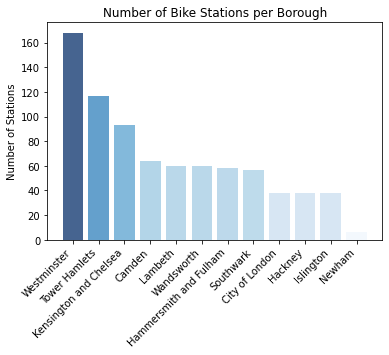

In [156]:
# create a bar chart with the number of stations per borough
borough_counts = bike_locs.groupby('borough').size()
borough_counts = borough_counts.sort_values(ascending=False)

# set up the bar chart
fig, ax = plt.subplots()
bars = ax.bar(borough_counts.index, borough_counts.values, color=[color_dict[borough] for borough in borough_counts.index], alpha=0.75)

# set the axis labels and title
ax.set_title('Number of Bike Stations per Borough')
ax.set_ylabel('Number of Stations')
plt.xticks(rotation=45, ha='right')

plt.show()



### 3. Visualize london boroughs on map -> use color scale by station counts

In [147]:
# read the GeoJSON data for London borough boundaries
boroughs_geojson = gpd.read_file('https://skgrange.github.io/www/data/london_boroughs.json')

    
default_color = '#999999'

def style_function(feature):
    borough_name = feature['properties']['name']
    if borough_name in colors:
        fill_color = color_dict_density[borough_name]
    else:
        fill_color = default_color
    return {
        'fillColor': fill_color,
        'color': 'black',
        'weight': 2,
        'fillOpacity': 0.6,

    }
  
# create a map centered on London
base_map = folium.Map(location=london_coords, zoom_start=11, tiles='Stamen Toner')

# add the borough boundaries to the map
folium.GeoJson(boroughs_geojson, name='geojson', style_function=style_function).add_to(base_map)

# save the map as an HTML file
base_map.save('map_london_boroughs.html')

# plot
IFrame('map_london_boroughs.html', width=900, height=500)

### 4. Visualize the bike locations by borough

In [157]:
import random
import branca.colormap as cm

# add markers for each bike location, colored based on the borough
for index, row in bike_locs.iterrows():
    popup_text = f"{row['name']} (borough: {row['borough']}))"
    marker = folium.CircleMarker(location=(row['lat'], row['lon']), radius=1, popup=popup_text, color="purple", fill_opacity=0.7)
    marker.add_to(base_map)
    
# save the map as an HTML file
base_map.save('map_bike_loc_borough.html')

# plot
IFrame('map_bike_loc_borough.html', width=900, height=500)